### Steps to use JupyterNotebook

- Add in the Julia REPL:

  ```julia
  using Pkg
  Pkg.add("IJulia")
  ```

  to install IJulia.

  To update the packages only, keeping Julia itself the same, just run:

  ```julia
  Pkg.update()
  ```

  If you install a new Julia binary, you must update the IJulia installation by running

  ```julia
  Pkg.build("IJulia")
  ```

- Type the following in Julia REPL:

  ```julia
  using IJulia
  notebook()
  ```

  to launch the IJulia notebook in your browser.

  The first time you run `notebook()`, it will prompt you for whether it should install Jupyter.

  You can use 

  ````julia 
  notebook(detached=true)
  ````

  to launch a notebook server in the background that will persist even when you quit Julia.

- Create a new Notebook for Julia:

  - Click on New which is located on the top-right of your screen.
  - Then, select Julia from the drop-down list. 

In [10]:
using Pkg;
Pkg.add(path="https://github.com/palmtree2013/DelaySSAToolkit.jl")
# Pkg.instantiate()
# Pkg.add("Catalyst")
# Pkg.add("DiffEqJump")
# Pkg.add("ModelingToolkit")

   Resolving package versions...
  No Changes to `~/.julia/dev/DelaySSAToolkit/Project.toml`
  No Changes to `~/.julia/dev/DelaySSAToolkit/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/dev/DelaySSAToolkit/Project.toml`
  No Changes to `~/.julia/dev/DelaySSAToolkit/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/dev/DelaySSAToolkit/Project.toml`
  No Changes to `~/.julia/dev/DelaySSAToolkit/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/dev/DelaySSAToolkit/Project.toml`
  No Changes to `~/.julia/dev/DelaySSAToolkit/Manifest.toml`


In [11]:
using DelaySSAToolkit, Catalyst
using DiffEqJump
using Plots; theme(:vibrant) # Pkg.add("Plots")

In [12]:
rn = @reaction_network begin
    ρ, S+I --> E+I
    r, I --> R
end ρ r
jumpsys = convert(JumpSystem, rn, combinatoric_ratelaws=false)

Model ##ReactionSystem#293 with 2 equations
States (4):
  S(t)
  I(t)
  E(t)
  R(t)
Parameters (2):
  ρ
  r

In [13]:
u0 = [999,1,0,0]
de_chan0 = [[]]
tf = 400.
tspan = (0,tf)

(0, 400.0)

In [14]:
ps = [1e-4, 1e-2]
τ = 20.
dprob = DiscreteProblem(jumpsys,u0,tspan, ps)
delay_trigger_affect! = function (integrator, rng)
    append!(integrator.de_chan[1], τ)
end
delay_trigger = Dict(1=>delay_trigger_affect!)
# delay_trigger = Dict(1=>[1=>τ])
delay_complete = Dict(1=>[2=>1, 3=>-1])
delay_interrupt = Dict()
# algo = DelayDirect()
# algo = DelayDirectCR()
algo = DelayRejection()
delayjumpset = DelayJumpSet(delay_trigger, delay_complete, delay_interrupt)
jprob = DelayJumpProblem(jumpsys, dprob, algo, delayjumpset, de_chan0, save_positions=(true,true))


Number of constant rate jumps: 0
Number of variable rate jumps: 0
Have a mass action jump
Number of delay trigger reactions: 1
Number of delay interrupt reactions: 0


In [15]:
sol = solve(jprob, SSAStepper(), seed = 1234);

retcode: Default
Interpolation: Piecewise constant interpolation
t: 2891-element Vector{Float64}:
   0.0
   4.49949499085439
  12.547901718155334
  19.18828772825969
  24.499494990854387
  28.678537821887925
  32.54790171815533
  33.27902999749239
  34.225893669540945
  34.4743017722904
   ⋮
 392.23554505794294
 393.0524525577359
 394.9095757608095
 396.4881748676349
 396.84020146818324
 397.29074247315623
 398.3911487759906
 399.51909621368645
 400.0
u: 2891-element Vector{Vector{Int64}}:
 [999, 1, 0, 0]
 [998, 1, 1, 0]
 [997, 1, 2, 0]
 [996, 1, 3, 0]
 [996, 2, 2, 0]
 [996, 1, 2, 1]
 [996, 2, 1, 1]
 [995, 2, 2, 1]
 [994, 2, 3, 1]
 [993, 2, 4, 1]
 ⋮
 [0, 116, 0, 884]
 [0, 115, 0, 885]
 [0, 114, 0, 886]
 [0, 113, 0, 887]
 [0, 112, 0, 888]
 [0, 111, 0, 889]
 [0, 110, 0, 890]
 [0, 109, 0, 891]
 [0, 109, 0, 891]

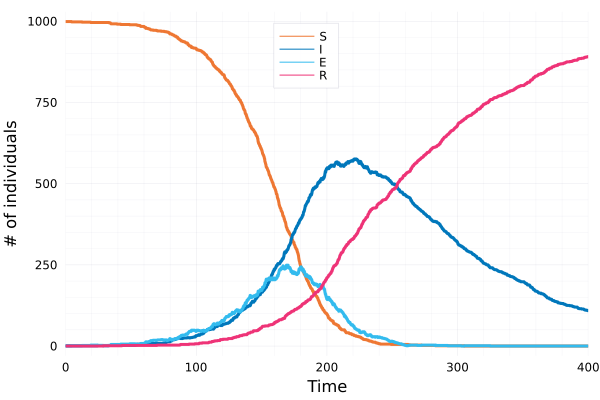

In [17]:
fig = plot(sol, label = ["S" "I" "E" "R"], linewidth = 3, legend = :top, ylabel = "# of individuals", xlabel = "Time", fmt=:png)